# Imports

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, recall_score, roc_curve, precision_score, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
import pickle as pk
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Read Data

In [2]:
data = pd.read_csv("/Users/snouto/Downloads/dataset_diabetes/diabetic_data.csv")
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
data.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [4]:
data.sample(n=5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
31292,100557228,1369710,Caucasian,Female,[60-70),?,2,1,1,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
88178,282710100,98331813,Caucasian,Female,[80-90),?,2,3,1,3,...,No,No,No,No,No,No,No,No,Yes,>30
2757,17703138,88835868,Caucasian,Male,[70-80),?,6,1,7,6,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
6102,30737394,108570978,Caucasian,Male,[70-80),?,3,1,1,1,...,No,No,No,No,No,No,No,No,Yes,NO
99941,419590640,114314355,Caucasian,Female,[70-80),?,1,3,7,5,...,No,Steady,No,No,No,No,No,No,Yes,NO


In [5]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [6]:
# Checking nulls
print(data.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [7]:
# Investigate unique values in weight column
data["weight"].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [8]:
# number of records whose weight is missing
data[data['weight']=='?']['weight'].count()

98569

In [9]:
data.shape

(101766, 50)

In [10]:
# no. of records with weight 
data.shape[0] - data[data['weight']=='?']['weight'].count()

3197

In [11]:
data.drop("weight",inplace=True,axis=1)

In [12]:
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
# payer_code column, > 52% have missing values
data[data["payer_code"] == '?']['payer_code'].count()

40256

In [14]:
data.drop("payer_code",inplace=True,axis=1)

In [15]:
# medical_specialty has missing > 53% missing values
data.drop("medical_specialty",axis=1,inplace=True)

In [16]:
# cleaning trailing spaces fr
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [17]:
# removing commas if present
data["diag_1"]=data["diag_1"].str.replace(',','')
data["diag_2"]=data["diag_2"].str.replace(',','')
data["diag_3"]=data["diag_3"].str.replace(',','')

In [18]:
data['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [19]:
data.isnull()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

In [21]:
# Checking duplicate data
duplicate = data[data.duplicated()]
print('number of duplicate rows:' , duplicate.shape)

number of duplicate rows: (0, 47)


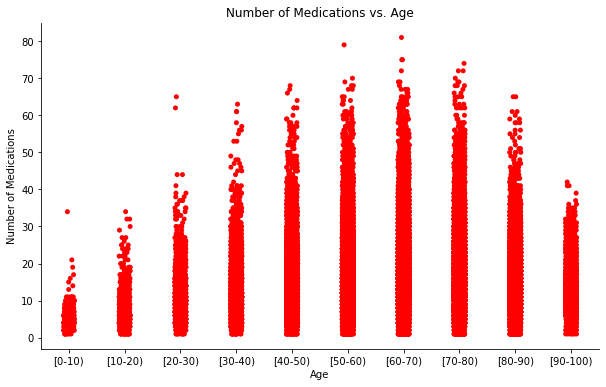

In [22]:

#Let's try to see how the age and number of medicines vary,
sortage = data.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

In [23]:
data.shape

(101766, 47)

In [24]:
# Transforming readmitted column into binary column, where No equals 0 and any thing else is 1
data['readmit'] = np.where(data['readmitted'] == 'NO',0,1)
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


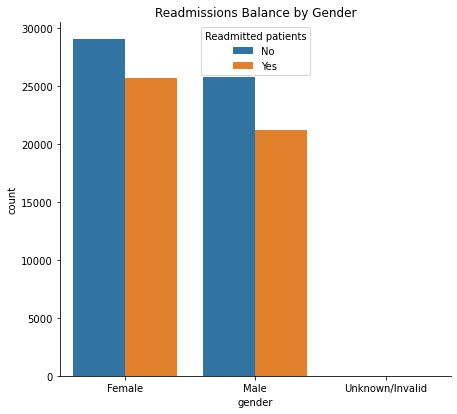

In [25]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'readmit', data = data) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

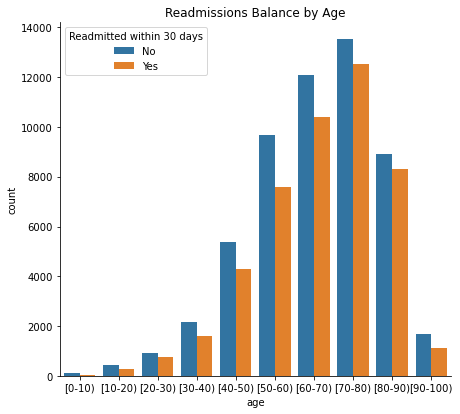

In [26]:

#Relation between age and readmission,

b = data.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = 'readmit', data = data, order = b_sort) 

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

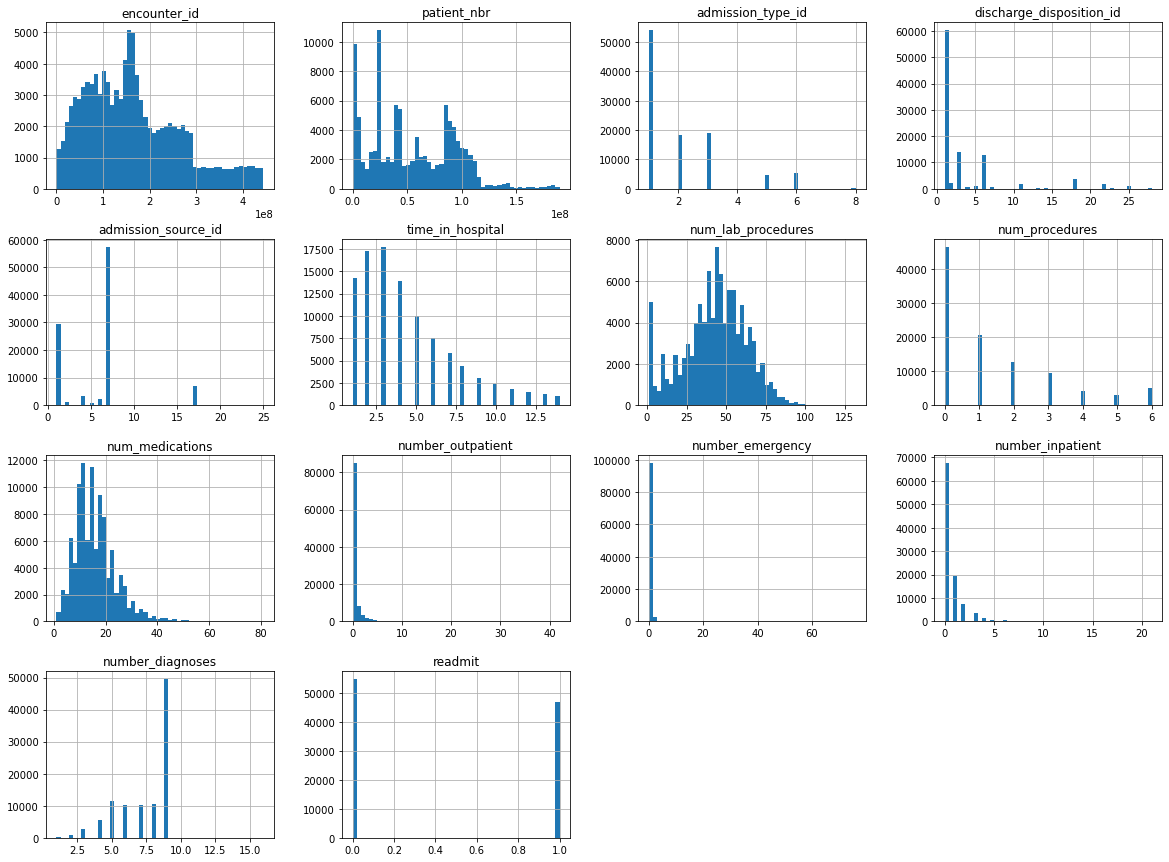

In [27]:
data.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='age', ylabel='count'>

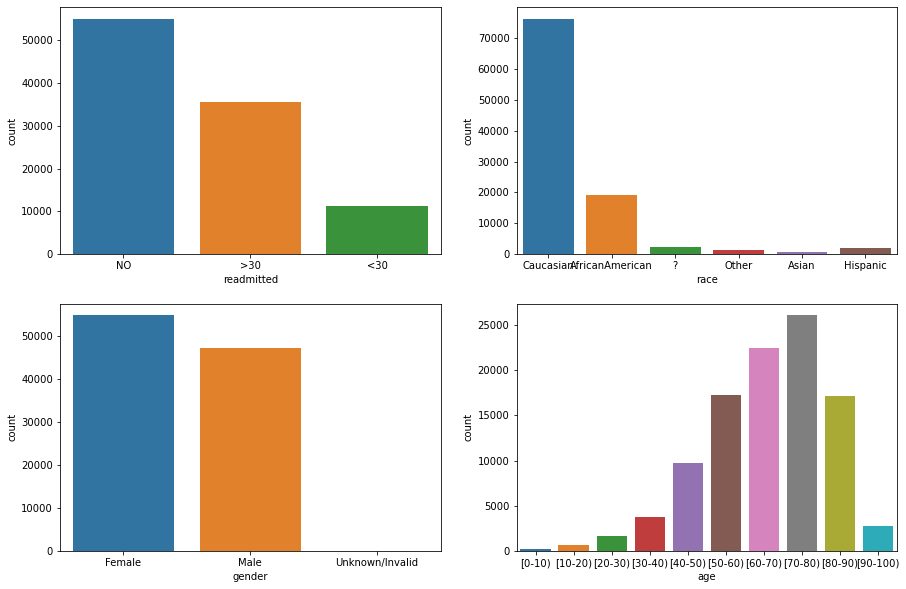

In [28]:

#Exploring the categorical variables,
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)
sns.countplot(x="readmitted", data=data, ax=ax[0][0])
sns.countplot(x="race", data=data, ax=ax[0][1])
sns.countplot(x="gender", data=data, ax=ax[1][0])
sns.countplot(x="age", data=data, ax=ax[1][1])


In [29]:
# Checking nulls
print(data.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

In [30]:
data.count()

encounter_id                101766
patient_nbr                 101766
race                        101766
gender                      101766
age                         101766
admission_type_id           101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101766
diag_2                      101766
diag_3                      101766
number_diagnoses            101766
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride                 101766
acetohexamide               101766
glipizide                   101766
glyburide           

In [31]:
data['metformin'].unique()

array(['No', 'Steady', 'Up', 'Down'], dtype=object)

In [32]:
data['metformin'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['repaglinide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['nateglinide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['chlorpropamide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['glimepiride'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['acetohexamide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['glipizide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['glyburide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['tolbutamide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['pioglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['rosiglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['acarbose'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['miglitol'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['troglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['tolazamide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['troglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['examide'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['citoglipton'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['glyburide-metformin'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['glipizide-metformin'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['glimepiride-pioglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['metformin-rosiglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['metformin-pioglitazone'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)
data['gender'].replace({"Female":0,"Male":1},inplace=True)

data['insulin'].replace({"No":0,"Steady":1,"Up":3,"Down":2},inplace=True)

<AxesSubplot:xlabel='num_lab_procedures'>

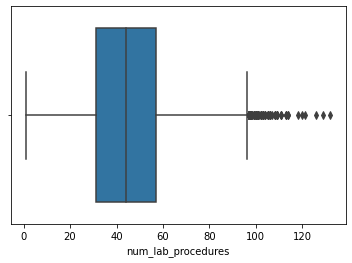

In [33]:
sns.boxplot(x=data['num_lab_procedures'])

In [34]:
# Encoding age column from age intervals to ordinal numerical values for classification
data['age'].replace({"[0-10)":1,"[10-20)":2,"[20-30)":3,"[30-40)":4,"[40-50)":5,"[50-60)":6,"[60-70)":7,
                    "[70-80)":8,"[80-90)":9,"[90-100)":10},inplace=True)
data.head(n=20)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit
0,2278392,8222157,Caucasian,0,1,6,25,1,1,41,...,0,0,0,0,0,0,No,No,NO,0
1,149190,55629189,Caucasian,0,2,1,1,7,3,59,...,3,0,0,0,0,0,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,0,3,1,1,7,2,11,...,0,0,0,0,0,0,No,Yes,NO,0
3,500364,82442376,Caucasian,1,4,1,1,7,2,44,...,3,0,0,0,0,0,Ch,Yes,NO,0
4,16680,42519267,Caucasian,1,5,1,1,7,1,51,...,1,0,0,0,0,0,Ch,Yes,NO,0
5,35754,82637451,Caucasian,1,6,2,1,2,3,31,...,1,0,0,0,0,0,No,Yes,>30,1
6,55842,84259809,Caucasian,1,7,3,1,2,4,70,...,1,0,0,0,0,0,Ch,Yes,NO,0
7,63768,114882984,Caucasian,1,8,1,1,7,5,73,...,0,0,0,0,0,0,No,Yes,>30,1
8,12522,48330783,Caucasian,0,9,2,1,4,13,68,...,1,0,0,0,0,0,Ch,Yes,NO,0
9,15738,63555939,Caucasian,0,10,3,3,4,12,33,...,1,0,0,0,0,0,Ch,Yes,NO,0


In [35]:
data['diabetesMed'].replace({"No":0,"Yes":1},inplace=True)
data['change'].replace({"No":0,"Ch":1},inplace=True)
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit
0,2278392,8222157,Caucasian,0,1,6,25,1,1,41,...,0,0,0,0,0,0,0,0,NO,0
1,149190,55629189,Caucasian,0,2,1,1,7,3,59,...,3,0,0,0,0,0,1,1,>30,1
2,64410,86047875,AfricanAmerican,0,3,1,1,7,2,11,...,0,0,0,0,0,0,0,1,NO,0
3,500364,82442376,Caucasian,1,4,1,1,7,2,44,...,3,0,0,0,0,0,1,1,NO,0
4,16680,42519267,Caucasian,1,5,1,1,7,1,51,...,1,0,0,0,0,0,1,1,NO,0


In [36]:
data['readmitted'].replace({"NO":0,">30":2,"<30":1},inplace=True)
data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit
0,2278392,8222157,Caucasian,0,1,6,25,1,1,41,...,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,Caucasian,0,2,1,1,7,3,59,...,3,0,0,0,0,0,1,1,2,1
2,64410,86047875,AfricanAmerican,0,3,1,1,7,2,11,...,0,0,0,0,0,0,0,1,0,0
3,500364,82442376,Caucasian,1,4,1,1,7,2,44,...,3,0,0,0,0,0,1,1,0,0
4,16680,42519267,Caucasian,1,5,1,1,7,1,51,...,1,0,0,0,0,0,1,1,0,0


In [37]:
# Removing Dead patients
data = data[((data.discharge_disposition_id != 11) & 
                                          (data.discharge_disposition_id != 13) &
                                          (data.discharge_disposition_id != 14) & 
                                          (data.discharge_disposition_id != 19) & 
                                          (data.discharge_disposition_id != 20) & 
                                          (data.discharge_disposition_id != 21))]

In [38]:
data.drop(['readmitted','race','patient_nbr','encounter_id','max_glu_serum','A1Cresult','diag_1','diag_2','diag_3'],axis=1,inplace=True)

In [39]:
# Change the type of columns [readmitted and diabetesMed] from object into int
data['diabetesMed'] = data['diabetesMed'].astype(int)
data.dtypes

gender                      object
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
acetohexamide                int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone                 int64
rosiglitazone                int64
acarbose                     int64
miglitol                     int64
troglitazone                 int64
tolazamide                   int64
examide             

In [40]:
# Adding a new combined column that represents the diabetes/disease degree
# that will act as our new target variable

data['ddegree'] = data['readmit'] & data['diabetesMed']
data.head()

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmit,ddegree
0,0,1,6,25,1,1,41,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,1,1,7,3,59,0,18,0,...,3,0,0,0,0,0,1,1,1,1
2,0,3,1,1,7,2,11,5,13,2,...,0,0,0,0,0,0,0,1,0,0
3,1,4,1,1,7,2,44,1,16,0,...,3,0,0,0,0,0,1,1,0,0
4,1,5,1,1,7,1,51,0,8,0,...,1,0,0,0,0,0,1,1,0,0


In [41]:
# Check the class imbalance if exists
data['diabetesMed'].value_counts()

1    76719
0    22624
Name: diabetesMed, dtype: int64

In [42]:
# check the class imbalance if exists
data['readmit'].value_counts()

0    52527
1    46816
Name: readmit, dtype: int64

In [125]:
# Normalizing using Standard Scaler (Z-Score)
target_name = "ddegree"

data.drop(data.index[data['gender'] == 'Unknown/Invalid'],inplace=True)
XF = data.drop([target_name,'diabetesMed','readmit'],axis=1)
# Perform Standard Scaler
scaler = StandardScaler()
X = scaler.fit_transform(XF)
Y = data[target_name]

In [126]:
# transform the scaled matrix back into DataFrame for visualizing
df = pd.DataFrame(X,columns=XF.columns)
df.head(n=20)

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change
0,-0.926510,-3.809535,2.744602,4.143900,-1.163853,-1.138455,-0.097257,-0.783548,-1.850433,-0.291867,...,-0.018978,0.0,0.0,-0.868476,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,-0.930909
1,-0.926510,-3.182390,-0.712311,-0.485670,0.312148,-0.464686,0.820652,-0.783548,0.249657,-0.291867,...,-0.018978,0.0,0.0,2.111779,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,1.074219
2,-0.926510,-2.555246,-0.712311,-0.485670,0.312148,-0.801570,-1.627106,2.152858,-0.368016,1.288969,...,-0.018978,0.0,0.0,-0.868476,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,-0.930909
3,1.079319,-1.928101,-0.712311,-0.485670,0.312148,-0.801570,0.055727,-0.196267,0.002588,-0.291867,...,-0.018978,0.0,0.0,2.111779,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,1.074219
4,1.079319,-1.300956,-0.712311,-0.485670,0.312148,-1.138455,0.412692,-0.783548,-0.985690,-0.291867,...,-0.018978,0.0,0.0,0.124942,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,1.074219
5,1.079319,-0.673811,-0.020928,-0.485670,-0.917852,-0.464686,-0.607207,2.740140,0.002588,-0.291867,...,-0.018978,0.0,0.0,0.124942,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,-0.930909
6,1.079319,-0.046667,0.670455,-0.485670,-0.917852,-0.127802,1.381596,-0.196267,0.620261,-0.291867,...,-0.018978,0.0,0.0,0.124942,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,1.074219
7,1.079319,0.580478,-0.712311,-0.485670,0.312148,0.209083,1.534581,-0.783548,-0.491551,-0.291867,...,-0.018978,0.0,0.0,-0.868476,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,-0.930909
8,-0.926510,1.207623,-0.020928,-0.485670,-0.425852,2.904157,1.279606,0.391014,1.485004,-0.291867,...,-0.018978,0.0,0.0,0.124942,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,1.074219
9,-0.926510,1.834768,0.670455,-0.099873,-0.425852,2.567273,-0.505217,0.978296,0.249657,-0.291867,...,-0.018978,0.0,0.0,0.124942,-0.082069,-0.01144,-0.003173,-0.004487,-0.003173,1.074219


## Pickling 

In [163]:
def save_to_file(data,file):
    with open(file,"wb") as writer:
        pk.dump(data,writer)
    print(f"Data was pickled Successfully To : {file}")

In [164]:
save_to_file(XF,"files/processed.data.bin")

Data was pickled Successfully To : files/processed.data.bin


# split data

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [128]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,random_state=0)

## Model#1 (KNN)

In [129]:
#X_train,X_test , Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)



In [130]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [131]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [132]:
y_test.head()

31754    1
70005    1
32231    0
72589    1
97880    0
Name: ddegree, dtype: int64

In [133]:
model.score(X_train,y_train)

0.8244702665755297

In [134]:
# Print the model accuracy
y_pred = model.predict(X_test)
accur = accuracy_score(y_test,y_pred)
print(f"Accuracy : {accur}")

Accuracy : 0.6588483994362795


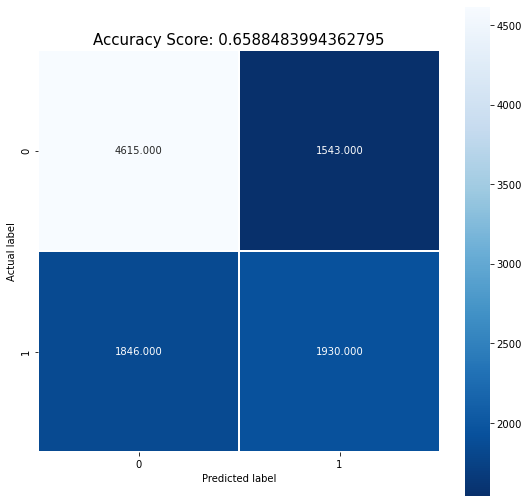

In [135]:
# Plotting Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [136]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.71      0.75      0.73      6158
         YES       0.56      0.51      0.53      3776

    accuracy                           0.66      9934
   macro avg       0.64      0.63      0.63      9934
weighted avg       0.65      0.66      0.66      9934



In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, recall_score, roc_curve, precision_score, accuracy_score, f1_score, confusion_matrix

In [165]:
save_to_file(model,"files/knn.model")

Data was pickled Successfully To : files/knn.model


## Model #2 (Logistic Regression)


In [141]:
#(HyperParameter)garadshrsh matrices

In [ ]:
models_dict = {'Model':[],
              'Accuracy':[],
              'Recall':[],
              'Precision':[],
              'F1 score':[],}

In [142]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)

print("\nLogistic Regression Accuracy=",accuracy_score(y_val, y_pred))
print("Logistic Regression F1 score=",f1_score(y_val, y_pred))


Logistic Regression Accuracy= 0.6645789061626216
Logistic Regression F1 score= 0.4353229147053285


In [143]:
y_pred_proba = lr.predict_proba(X_val)[::,1]
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_val, y_pred_proba)
lr_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("Logistic Regression ")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))

<AxesSubplot:>

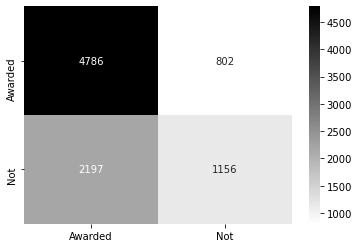

In [144]:
cm = confusion_matrix(y_val, y_pred)
class_label = ["Awarded", "Not"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.binary)

In [166]:
save_to_file(lr,"files/logistic.model")

Data was pickled Successfully To : files/logistic.model


## Model #3 (Decision Trees)

In [146]:
# finding the best parameters for the decision tree
param_grid = {'criterion' :['gini', 'entropy'],
              'max_depth' : list(range(5,20)),
             'max_features': ['auto', 'sqrt', 'log2']}

tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid,
                           cv=5, verbose=True, scoring = 'f1')
grid_search.fit(X_train_val, y_train_val)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(max_depth=19, max_features='auto', random_state=42)


In [147]:
# trying with entropy, since it didn't show in the previose step
tree = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=8,
                                     max_features='auto',
                                     random_state=42)

tree.fit(X_train,y_train)
y_pred = tree.predict(X_val)

print("DT Accuracy=",accuracy_score(y_val, y_pred))
print("DT F1 score=",f1_score(y_val, y_pred))

DT Accuracy= 0.6661447265406554
DT F1 score= 0.5304388862671071


In [148]:
# stroring the best models in the dict
y_pred_proba = tree.predict_proba(X_val)[::,1]
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_val, y_pred_proba)
dt_roc_auc = roc_auc_score(y_val, y_pred_proba)

models_dict['Model'].append("Decision Tree")
models_dict['Accuracy'].append(accuracy_score(y_val, y_pred))
models_dict['Recall'].append(recall_score(y_val, y_pred))
models_dict['Precision'].append(precision_score(y_val, y_pred))
models_dict['F1 score'].append(f1_score(y_val, y_pred))

<AxesSubplot:>

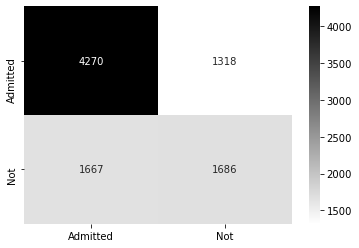

In [149]:
# plotting confusion mtrix
cm = confusion_matrix(y_val, y_pred)
class_label = ["Admitted", "Not"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d", cmap=plt.cm.binary)

In [167]:
save_to_file(tree,"files/decision.tree.model")

Data was pickled Successfully To : files/decision.tree.model


## Model 4 (Random Forest)

In [150]:
rfc = RandomForestClassifier(n_estimators=30)

In [151]:
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train)

0.9993786118188032

In [152]:
rfc.score(X_test,y_test)

0.6861284477551842

In [168]:
save_to_file(rfc,"files/random.forest.model")

Data was pickled Successfully To : files/random.forest.model
